In [1]:
from fyers_api import accessToken
from fyers_api.Websocket import ws
import pandas as pd
from fyers_api import accessToken
from fyers_api import fyersModel
import os
import math
import datetime
import csv
import numpy as np

In [2]:
client_id='TAZ287TZUA-100'
secret_id='PPZ5ZG1YAR'
url='https://www.google.com/'
response_type = "code"
grant_type = "authorization_code"

In [3]:
session=accessToken.SessionModel(
    client_id=client_id,
    secret_key=secret_id,
    redirect_uri=url, 
    response_type=response_type,
    grant_type=grant_type
)

response = session.generate_authcode()
print(response)

https://api.fyers.in/api/v2/generate-authcode?client_id=TAZ287TZUA-100&redirect_uri=https%3A%2F%2Fwww.google.com%2F&response_type=code&state=None


In [4]:
auth_code='eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkubG9naW4uZnllcnMuaW4iLCJpYXQiOjE2OTYxNzQyOTMsImV4cCI6MTY5NjIwNDI5MywibmJmIjoxNjk2MTczNjkzLCJhdWQiOiJbXCJ4OjBcIiwgXCJ4OjFcIiwgXCJ4OjJcIiwgXCJkOjFcIiwgXCJkOjJcIiwgXCJ4OjFcIiwgXCJ4OjBcIl0iLCJzdWIiOiJhdXRoX2NvZGUiLCJkaXNwbGF5X25hbWUiOiJYTTA0MzQyIiwib21zIjoiSzEiLCJoc21fa2V5IjoiNWI3Mzg3ZTYxOGQzODllNGVjOGVmZjU1ODM0ZTBmMTA1NjdjYWU1ODk5YWQ5NWY3MzgxMTM3YTMiLCJub25jZSI6IiIsImFwcF9pZCI6IlRBWjI4N1RaVUEiLCJ1dWlkIjoiZWY2MjViOWY1MTYzNDM1M2I2NDg0YmFlMTE4MjBjZmEiLCJpcEFkZHIiOiIwLjAuMC4wIiwic2NvcGUiOiIifQ.tXK8ra0zFNsbNNphgkqToFxQRi-PmiNxRu17e-t7GlI'

In [5]:
session.set_token(auth_code)
response = session.generate_token()
print(response)

{'s': 'ok', 'code': 200, 'message': '', 'access_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE2OTYxNzQzMTAsImV4cCI6MTY5NjIwNjY1MCwibmJmIjoxNjk2MTc0MzEwLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbEdaRG1BbGI1eGVtS2xSenZ0UUxlU29HOTZvRl9zZlZHZ2RKZXUzMS1RZ3YxRVRYSHMzNjRTN3hrNUlzczFpUnBHbHVoREY3YTdtWHcwTnhiNEFra29URVJxWWxSOEt1OWt5NTQ0VnJETmVGUk9mTT0iLCJkaXNwbGF5X25hbWUiOiJNT0hBTU1FRCBSQVlZQU4gU0FJVCIsIm9tcyI6IksxIiwiaHNtX2tleSI6IjViNzM4N2U2MThkMzg5ZTRlYzhlZmY1NTgzNGUwZjEwNTY3Y2FlNTg5OWFkOTVmNzM4MTEzN2EzIiwiZnlfaWQiOiJYTTA0MzQyIiwiYXBwVHlwZSI6MTAwLCJwb2FfZmxhZyI6Ik4ifQ.YgMFajoMB3J3XfecPG8KKpe1nNRNTPuIQeayqnzEtHM', 'refresh_token': 'eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE2OTYxNzQzMTAsImV4cCI6MTY5NzQxNjI1MCwibmJmIjoxNjk2MTc0MzEwLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6InJlZnJlc2hfdG9rZW4iLCJhdF9oYXNoIjoiZ0FBQU

In [6]:
access_token=response['access_token']

In [7]:
fyers=fyersModel.FyersModel(client_id=client_id,token=access_token,log_path=os.getcwd())

In [86]:
symbol="NSE:LT-EQ"
data = {
    "symbol":symbol,
    "resolution":"5",
    "date_format":"1",
    "range_from":"2023-07-1",
    "range_to":"2023-09-28",
    "cont_flag":"1"
}

response = fyers.history(data=data)
print(response)

{'s': 'ok', 'candles': [[1688355900, 2478.2, 2492.4, 2478.2, 2484.85, 60916], [1688356200, 2484.85, 2488.4, 2480.45, 2480.6, 25614], [1688356500, 2480.6, 2483.35, 2469.4, 2470.95, 26038], [1688356800, 2469.8, 2477.1, 2468.8, 2471.0, 27729], [1688357100, 2471.0, 2472.5, 2465.3, 2468.65, 17065], [1688357400, 2468.65, 2468.75, 2465.0, 2466.5, 11717], [1688357700, 2466.5, 2467.4, 2463.3, 2465.55, 10316], [1688358000, 2464.25, 2468.15, 2464.0, 2465.0, 8536], [1688358300, 2465.0, 2466.5, 2463.8, 2464.45, 5942], [1688358600, 2464.25, 2464.35, 2460.7, 2461.45, 10097], [1688358900, 2462.0, 2464.65, 2460.55, 2464.15, 5865], [1688359200, 2464.15, 2464.75, 2461.75, 2462.55, 7254], [1688359500, 2462.2, 2462.2, 2454.95, 2455.9, 19855], [1688359800, 2456.0, 2460.0, 2455.5, 2459.5, 5791], [1688360100, 2459.0, 2468.9, 2459.0, 2468.1, 10101], [1688360400, 2468.95, 2475.65, 2468.1, 2475.05, 19337], [1688360700, 2475.05, 2480.0, 2474.4, 2479.95, 21611], [1688361000, 2480.0, 2481.8, 2476.5, 2479.3, 20271],

In [87]:
candleSticks=response['candles']


In [88]:
closingValues=[]
candleSticksForDF=[]
for item in candleSticks:
    candleSticksForDF.append(item)
    closingValues.append(item[4])

In [89]:
valuesToPlot={'closingValues':closingValues,'candleStick':candleSticksForDF}
df = pd.DataFrame(valuesToPlot)
df

,closingValues,candleStick
0,2484.85,"[1688355900, 2478.2, 2492.4, 2478.2, 2484.85, ..."
1,2480.60,"[1688356200, 2484.85, 2488.4, 2480.45, 2480.6,..."
2,2470.95,"[1688356500, 2480.6, 2483.35, 2469.4, 2470.95,..."
3,2471.00,"[1688356800, 2469.8, 2477.1, 2468.8, 2471.0, 2..."
4,2468.65,"[1688357100, 2471.0, 2472.5, 2465.3, 2468.65, ..."
...,...,...
4655,3010.00,"[1695893700, 3012.2, 3013.3, 3007.3, 3010.0, 5..."
4656,3005.95,"[1695894000, 3010.0, 3011.95, 3005.2, 3005.95,..."
4657,3006.00,"[1695894300, 3005.85, 3008.4, 3005.05, 3006.0,..."
4658,3012.25,"[1695894600, 3006.0, 3014.25, 3003.3, 3012.25,..."


In [90]:
small_lookback = 5
df['mean'] = df['closingValues'].ewm(span=5).mean()

In [91]:
import pandas as pd

# Assuming you have your price data in a DataFrame 'df' under the 'candleStick' column

# Define the window and standard deviation multiplier
window = 10  # You can adjust this window size as needed
std_dev_multiplier = 1.5  # Multiplier for standard deviation

# Calculate the rolling mean (SMA) and rolling standard deviation
df['SMA'] = df['candleStick'].apply(lambda x: pd.Series(x[4])).rolling(window=window).mean()
df['StdDev'] = df['candleStick'].apply(lambda x: pd.Series(x[4])).rolling(window=window).std()

# Calculate the upper and lower Bollinger Bands
df['Upper_Band'] = df['SMA'] + (std_dev_multiplier * df['StdDev'])
df['Lower_Band'] = df['SMA'] - (std_dev_multiplier * df['StdDev'])

# Print the resulting DataFrame 'df' with Bollinger Bands
print(df)


      closingValues                                        candleStick  \
0           2484.85  [1688355900, 2478.2, 2492.4, 2478.2, 2484.85, ...   
1           2480.60  [1688356200, 2484.85, 2488.4, 2480.45, 2480.6,...   
2           2470.95  [1688356500, 2480.6, 2483.35, 2469.4, 2470.95,...   
3           2471.00  [1688356800, 2469.8, 2477.1, 2468.8, 2471.0, 2...   
4           2468.65  [1688357100, 2471.0, 2472.5, 2465.3, 2468.65, ...   
...             ...                                                ...   
4655        3010.00  [1695893700, 3012.2, 3013.3, 3007.3, 3010.0, 5...   
4656        3005.95  [1695894000, 3010.0, 3011.95, 3005.2, 3005.95,...   
4657        3006.00  [1695894300, 3005.85, 3008.4, 3005.05, 3006.0,...   
4658        3012.25  [1695894600, 3006.0, 3014.25, 3003.3, 3012.25,...   
4659        3025.85  [1695894900, 3013.35, 3027.0, 3012.05, 3025.85...   

             mean       SMA    StdDev   Upper_Band   Lower_Band  
0     2484.850000       NaN       NaN        

In [92]:
import pandas as pd
import numpy as np


def rsi_tradingview(ohlc: pd.DataFrame, period: int = 14, round_rsi: bool = True):
    """ Implements the RSI indicator as defined by TradingView on March 15, 2021.
        The TradingView code is as follows:
        //@version=4
        study(title="Relative Strength Index", shorttitle="RSI", format=format.price, precision=2, resolution="")
        len = input(14, minval=1, title="Length")
        src = input(close, "Source", type = input.source)
        up = rma(max(change(src), 0), len)
        down = rma(-min(change(src), 0), len)
        rsi = down == 0 ? 100 : up == 0 ? 0 : 100 - (100 / (1 + up / down))
        plot(rsi, "RSI", color=#8E1599)
        band1 = hline(70, "Upper Band", color=#C0C0C0)
        band0 = hline(30, "Lower Band", color=#C0C0C0)
        fill(band1, band0, color=#9915FF, transp=90, title="Background")

    :param ohlc:
    :param period:
    :param round_rsi:
    :return: an array with the RSI indicator values
    """

    delta = ohlc["closingValues"].diff()

    up = delta.copy()
    up[up < 0] = 0
    up = pd.Series.ewm(up, alpha=1/period).mean()

    down = delta.copy()
    down[down > 0] = 0
    down *= -1
    down = pd.Series.ewm(down, alpha=1/period).mean()

    rsi = np.where(up == 0, 0, np.where(down == 0, 100, 100 - (100 / (1 + up / down))))

    return np.round(rsi, 2) if round_rsi else rsi

In [93]:
import pandas as pd




def stoch_rsi_tradingview(ohlc: pd.DataFrame, period=14, smoothK=3, smoothD=3):
    """ Calculating Stochastic RSI (gives the same values as TradingView as of March 20, 2021.
        smoothK = input(3, "K", minval=1)
        smoothD = input(3, "D", minval=1)
        lengthRSI = input(14, "RSI Length", minval=1)
        lengthStoch = input(14, "Stochastic Length", minval=1)
        src = input(close, title="RSI Source")
        rsi1 = rsi(src, lengthRSI)
        k = sma(stoch(rsi1, rsi1, rsi1, lengthStoch), smoothK)
        d = sma(k, smoothD)

    :param ohlc:
    :param period:
    :param smoothK:
    :param smoothD:
    :return:
    """
    # Calculate RSI
    rsi = rsi_tradingview(ohlc, period=period, round_rsi=False)

    # Calculate StochRSI
    rsi = pd.Series(rsi)
    stochrsi  = (rsi - rsi.rolling(period).min()) / (rsi.rolling(period).max() - rsi.rolling(period).min())
    stochrsi_K = stochrsi.rolling(smoothK).mean()
    stochrsi_D = stochrsi_K.rolling(smoothD).mean()
    df['stochrsi_K']=round(stochrsi_K * 100, 2)
    df['stochrsi_D']=round(stochrsi_D * 100, 2)
    return round(rsi, 2), round(stochrsi_K * 100, 2), round(stochrsi_D * 100, 2)

In [94]:
stoch_rsi_tradingview(df)

(0         NaN
 1        0.00
 2        0.00
 3        0.39
 4        0.33
         ...  
 4655    38.99
 4656    35.05
 4657    35.13
 4658    45.06
 4659    59.57
 Length: 4660, dtype: float64,
 0         NaN
 1         NaN
 2         NaN
 3         NaN
 4         NaN
         ...  
 4655     2.21
 4656     0.00
 4657     0.10
 4658    12.12
 4659    45.45
 Length: 4660, dtype: float64,
 0         NaN
 1         NaN
 2         NaN
 3         NaN
 4         NaN
         ...  
 4655    15.35
 4656     5.94
 4657     0.77
 4658     4.08
 4659    19.23
 Length: 4660, dtype: float64)

In [95]:
counter=0
buyPrice=-420
entryPrice=-420
stopLossForLong=-420
stopLossForShort=-420
reward=3
buying=0
slCounter=0
tpCounter=0
eodCounter=0
stopLossCounterForDay=0
isLong=-420    
for index, row in df.iterrows():
    #Prints the number of times Stop loss is hit in a day
    if(str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]).time())=='15:15:00'):
        print('StopLoss on '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]))+' hit '+str(stopLossCounterForDay)+' times')
        stopLossCounterForDay=0
    #Sells everything if already bought a stock EOD
    if(buying==1):
        if(str(datetime.datetime.fromtimestamp(df['candleStick'][index][0]).time())=='15:15:00'):
            
            print(symbol+' EOD Exit at '+str(df['candleStick'][index][4]))
            #Dont forget this
            if(isLong==1):
                eodCounter=eodCounter+((df['candleStick'][index][4]-buyPrice)/(buyPrice-stopLossForLong))
            else:
                eodCounter=eodCounter+((df['candleStick'][index][4]-entryPrice)/(entryPrice-stopLossForShort))
            counter=0
            buyPrice=-420
            stopLossForLong=-420
            entryPrice=-420
            stopLossForShort=-420
            reward=3
            buying=0
    if(stopLossCounterForDay<2):
        if not math.isnan(df['mean'][index] ):
            if not((df['mean'][index]<= df['candleStick'][index][2]) and (df['mean'][index]>= df['candleStick'][index][3])) and df['Lower_Band'][index]>=df['candleStick'][index][3]:
                #Checks for reference candles
                if(buying!=1 ):
                    if(df['mean'][index]>df['candleStick'][index][2] )and df['Lower_Band'][index]>=df['candleStick'][index][3]:
                        print(symbol+' Reference Candle '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        buyPrice=df['candleStick'][index][2]
                        stopLossForLong=df['candleStick'][index][3]-0.3
                        isLong=1
            elif not((df['mean'][index]<= df['candleStick'][index][2]) and (df['mean'][index]>= df['candleStick'][index][3])) :
                if(buying!=1):
                    if(df['mean'][index]<df['candleStick'][index][2]):

                        print(symbol+' Reference Candle for short'+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                        entryPrice=df['candleStick'][index][3]
                        stopLossForShort=df['candleStick'][index][2]+0.3
                        isLong=0
            
            else:
                if(buyPrice!=-420 and stopLossForLong!=-420 or (entryPrice!=-420 and stopLossForShort!=-420)):
                    #Buy Order
                    if(isLong==1):
                        if(buying==0):
                            print(symbol+' Buy Triggered at '+str(buyPrice)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                            buying=1
                        #stoploss hit    
                        if(df['candleStick'][index][3]<=stopLossForLong):
                            print(symbol+' SL hit at '+str(stopLossForLong)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                            stopLossCounterForDay=stopLossCounterForDay+1
                            buying=0
                            buyPrice=-420
                            stopLossForLong=-420
                            slCounter=slCounter+1
                            isLong=-420
                            continue
                        targetPrice=buyPrice+((buyPrice-stopLossForLong)*reward)
                        #Sells if made more then 1:3 and meets stochrsi indicator condition
                        if(df['candleStick'][index][2]>=targetPrice and df['stochrsi_K'][index]<=df['stochrsi_D'][index]):
                            
                            buying=0
                            print(symbol+' TP hit at '+str(df['candleStick'][index][4])+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                            #tpCounter=tpCounter+1
                            tpCounter=tpCounter+((df['candleStick'][index][4]-buyPrice)/(buyPrice-stopLossForLong))
                            buyPrice=-420
                            stopLossForLong=-420
                            isLong=-420
                    elif(isLong==0):
                        if(buying==0):
                            print(symbol+' Sell Triggered at '+str(entryPrice)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                            buying=1
                        if(df['candleStick'][index][2]>=stopLossForShort):
                            stopLossCounterForDay=stopLossCounterForDay+1
                            print(symbol+' SL hit at '+str(stopLossForShort)+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                            buying=0
                            entryPrice=-420
                            stopLossForShort=-420
                            slCounter=slCounter+1
                            isLong=-420
                            continue
                        targetPrice=entryPrice+((entryPrice-stopLossForShort)*reward)
                        if(df['candleStick'][index][3]<=targetPrice and df['stochrsi_K'][index]>=df['stochrsi_D'][index]):
                            buying=0
                            print(symbol+' TP hit at '+str(df['candleStick'][index][4])+' '+str(datetime.datetime.fromtimestamp(df['candleStick'][index][0])))
                            tpCounter=tpCounter+((df['candleStick'][index][4]-entryPrice)/(entryPrice-stopLossForShort))
                            entryPrice=-420
                            stopLossForShort=-420
                            isLong=-420
      
print('TP:'+str(tpCounter))
print('SL:'+str(slCounter*-1))
roundValueForEOD=round(eodCounter,3)
print('EOD:'+str(roundValueForEOD))
roundValueForNet=round(((tpCounter)+(slCounter*-1)+(eodCounter)),3)
print('Net For Period='+ str(roundValueForNet))


NSE:LT-EQ Reference Candle 2023-07-03 10:20:00
NSE:LT-EQ Buy Triggered at 2460.0 2023-07-03 10:25:00
NSE:LT-EQ TP hit at 2475.2 2023-07-03 10:45:00
NSE:LT-EQ Reference Candle 2023-07-03 11:50:00
NSE:LT-EQ Buy Triggered at 2463.85 2023-07-03 11:55:00
NSE:LT-EQ SL hit at 2459.7999999999997 2023-07-03 14:10:00
NSE:LT-EQ Reference Candle 2023-07-03 14:15:00
NSE:LT-EQ Buy Triggered at 2458.0 2023-07-03 14:20:00
NSE:LT-EQ SL hit at 2456.2 2023-07-03 14:20:00
StopLoss on 2023-07-03 15:15:00 hit 2 times
NSE:LT-EQ Reference Candle for short2023-07-04 09:20:00
NSE:LT-EQ Reference Candle for short2023-07-04 09:25:00
NSE:LT-EQ Reference Candle for short2023-07-04 09:30:00
NSE:LT-EQ Sell Triggered at 2474.0 2023-07-04 09:35:00
StopLoss on 2023-07-04 15:15:00 hit 0 times
NSE:LT-EQ EOD Exit at 2463.45
NSE:LT-EQ Reference Candle for short2023-07-05 09:25:00
NSE:LT-EQ Reference Candle for short2023-07-05 09:30:00
NSE:LT-EQ Reference Candle for short2023-07-05 09:35:00
NSE:LT-EQ Reference Candle for sho

<Axes: >

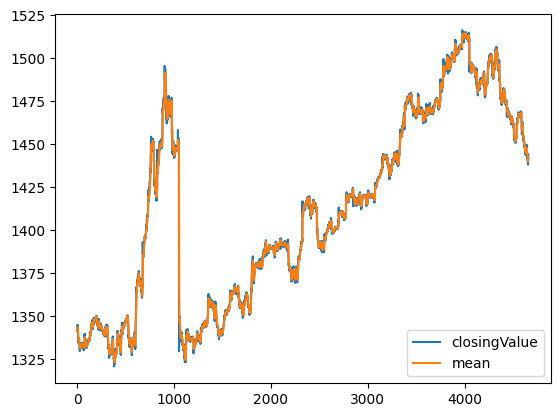

In [83]:
objForGraph={'closingValue':df['closingValues'],'mean':df['mean']}
dfToPlot = pd.DataFrame(objForGraph)
dfToPlot.plot()
